In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("ecommerce_data.csv")

In [3]:
df.head(5)

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [3]:
N = len(df)

time_of_day = np.array(df['time_of_day'])

time_day = np.zeros((N,df['time_of_day'].nunique()))
for i in range(N):
    time_day[i, time_of_day[i]] = 1
    

df = np.column_stack((df,time_day))
df = pd.DataFrame(df, columns=['mobile', 'products_viewed', 'visit_duration', 'returning','time_of_day','user_action','morning','noon','afternoon','evening'])
df = df.drop(['time_of_day'], axis=1)


In [5]:
df.head()

,mobile,products_viewed,visit_duration,returning,user_action,morning,noon,afternoon,evening
0,1.0,0.0,0.657510,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.568571,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.042246,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.659793,1.0,2.0,0.0,1.0,0.0,0.0
4,0.0,1.0,2.014745,1.0,2.0,0.0,1.0,0.0,0.0


In [4]:
#Xtrain = np.array(df.drop(['user_action'], 1))
targetraw = np.array(df['user_action'])
target = np.zeros((N,df['user_action'].nunique()))
for i in range(N):
    target[i, int(targetraw[i])] = 1
    


In [5]:
df = np.column_stack((df,target))
df = pd.DataFrame(df, columns=['mobile', 'products_viewed', 'visit_duration', 'returning','user_action','morning','noon','afternoon','evening','bounce','add_cart','checkout','buy'])
df = df.drop(['user_action'], axis=1)

In [6]:
bounce = df.loc[df["bounce"] ==1]
addcart = df.loc[df["add_cart"] ==1]
checkout = df.loc[df["checkout"] ==1]
complete = df.loc[df["buy"] ==1]

print(len(bounce),len(addcart),len(checkout),len(complete))

253 145 77 25


In [7]:
btrain = bounce[:int(len(bounce)*0.6)]
addtrain = addcart[:int(len(addcart)*0.6)]
checktrain = checkout[:int(len(checkout)*0.6)]
buytrain = complete[:int(len(complete)*0.6)]

bval = bounce[int(len(bounce)*0.6):int(len(bounce)*0.8)]
addval = addcart[int(len(addcart)*0.6):int(len(addcart)*0.8)]
checkval = checkout[int(len(checkout)*0.6):int(len(checkout)*0.8)]
buyval = complete[int(len(complete)*0.6):int(len(complete)*0.8)]

btest = bounce[int(len(bounce)*0.8):]
addtest = addcart[int(len(addcart)*0.8):]
checktest = checkout[int(len(checkout)*0.8):]
buytest = complete[int(len(complete)*0.8):]

In [8]:
frames = [btrain, addtrain, checktrain, buytrain]
dftrain = pd.concat(frames, ignore_index=True)


fval = [bval, addval, checkval, buyval]
dfval = pd.concat(fval, ignore_index=True)

ftest = [btest, addtest, checktest, buytest]
dftest = pd.concat(ftest, ignore_index=True)

In [9]:
X = np.array(dftrain.iloc[:,:8])
PHI = np.column_stack((np.array([[1]*len(dftrain)]).T, X))
y = np.array(dftrain.iloc[:,8:])

Xval = np.array(dfval.iloc[:,:8])
PHIval = np.column_stack((np.array([[1]*len(dfval)]).T, Xval))
yval = np.array(dfval.iloc[:,8:])

Xtest = np.array(dftest.iloc[:,:8])
PHItest = np.column_stack((np.array([[1]*len(dftest)]).T, Xtest))
ytest = np.array(dftest.iloc[:,8:])


In [4]:
def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis=1, keepdims = True)

def cross_entropy(Y, P):
    return -(1/N)*np.sum(Y*np.log(P))

def classification_rate(y, P):
    return np.mean(y.argmax(axis=1) == P.argmax(axis = 1))

def feed_forward(X, W1, b1, W2, b2):
    Z1 = np.tanh(np.matmul(X, W1) + b1)
    P = softmax(np.matmul(Z1, W2) + b2)
    return Z1, P


def feed_forward_sigmoid(X, W1, b1, W2, b2):
    Z1 = 1 / (1 + np.exp(-((X.dot(W1))+b1)))
    P = softmax(np.matmul(Z1, W2) + b2)
    return Z1, P
def sigmoid(h):
    return 

def cross_entropy_l2(y, p, w, lmbda, N):
    return cross_entropy(y, p) + (lmbda/(2*N))*np.sum(w**2) ##you have to use np.sum(w**2) instead of w.dot(w)

def cross_entropy_l1(y, p, w, lmbda, N):
    return cross_entropy(y, p) + (lmbda/N)*np.sum(np.abs(w)) ##We only use these formulas to train our model, 

#The formula I used for the cross_entropy function with L2 regularisation only works if w is a vector. This is why it's important to think about what everything is doing and not just plug and chug with the code.
#Remember that you need to be using the Frobenius norm, instead of the L2 norm.

[0.07965495824301155] [0.19080313450720568] [0.919732441471572] [0.91]


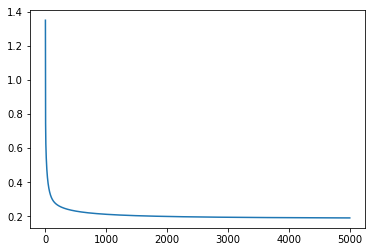

In [56]:
# Build the Model


w = np.random.randn(9, 4)
J = []
eta = 5e-1
epochs = int(5e3)
Jtrain = []
Jval = []
CRtrain = []
CRval = []

for t in range(epochs):
    p = softmax(PHI.dot(w))
    J.append(cross_entropy(y, p))
    w -= eta*(1/len(dftrain))*PHI.T.dot(p - y)
pval = softmax(PHIval.dot(w))
ptest = softmax(PHItest.dot(w))

Jtrain.append(J[-1]) # I want to start the last value of my error function, because it is the slowest
Jval.append(cross_entropy(yval,pval)) # Know that I have my model trained, so I want to see what my single value for Jval would be and I am going to put that in an array to letter add the other Js that I get testing different lambdas and those will be added to Jval but I will still have my first value with of Jval with the unregularised Jval to compare it with
CRtrain.append(classification_rate(y, p)) 
CRval.append(classification_rate(yval, pval))

#You don't need an array or Js everytime you just want the most important, the lowest

#plt.figure(figsize=(12,9))
plt.plot(J)
print(Jval, Jtrain, CRtrain, CRval)

In [37]:
#Unregularised weights
print(classification_rate(y, p), classification_rate(yval, pval), classification_rate(ytest, ptest))

0.919732441471572 0.91 0.8712871287128713


In [75]:
## Regularisation will always increase your bias, lower you classification rate and increase your error. BUT this should only happen in your training data! in your validation these parameters should be better! that is the whole propose of cross validation. In this case it isn't the case, which means that regularisation is not the way to go

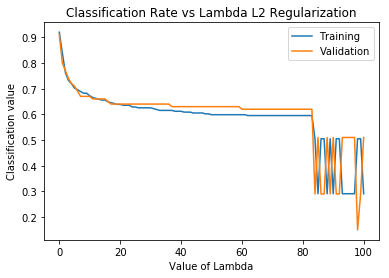

In [74]:
#L2 Regularization
#np.random.seed(111)
CRtrain = []
CRval = []
Jtrain = []
Jval = []
eta = 5e-1
epochs = int(5e3)
L2 = np.linspace(0,1000,101)
for i in np.linspace(0,1000,101):
    w = np.random.rand(9,4)
    lmbda = i
    for t in range(epochs):
        p = softmax(PHI.dot(w))
        w -= eta * (1/len(X)) * (PHI.T.dot(p-y) + lmbda*w) #This already contains L2 regularisation, we don't need to write the cross_entropy_l2/l1 function

    pval = softmax(PHIval.dot(w)) 
    CRtrain.append(classification_rate(y, p)) 
    CRval.append(classification_rate(yval, pval))
    Jtrain.append(cross_entropy(y, p)) #You don't want to use the cross_entropy_l2/l1 because you are already applying regularisation every time you run this code because the lambda in our for loop is going to be changing our weights every time, hence our p values and hence our J and Jval
    Jval.append(cross_entropy(yval, pval)) #we will get very similar results if we use cross entropy l1/l2 function instead of normal cross entropy 

    
plt.plot(CRtrain, label='Training')
plt.plot(CRval, label='Validation')
plt.title("Classification Rate vs Lambda L2 Regularization")
plt.xlabel("Value of Lambda")
plt.ylabel("Classification value")
plt.legend(loc='upper right')
#plt.savefig(filename)

In [72]:
#This graph is fine, doesn't matter how it look at long it coveys the point that you do worse with regularisation 

Text(0.5,1,'Error vs Lambda L2 Regularization')

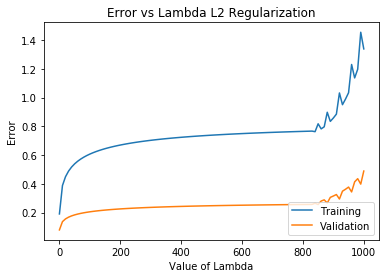

In [71]:
plt.plot(L2, Jtrain, label="Training")
plt.plot(L2, Jval, label="Validation")
plt.xlabel("Value of Lambda")
plt.ylabel("Error")
plt.legend(loc='lower right')
plt.title("Error vs Lambda L2 Regularization")
#plt.savefig(filename)


In [ ]:
##The line would only come from different angles and converge at some point if you benefit from regularising, in this case you clearly don't that is wht you don't see them converging. At this point none of the diagnostic worked so what you should do is to engineer polynomials or change to a more complex model

C:\Users\felip\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\felip\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sign


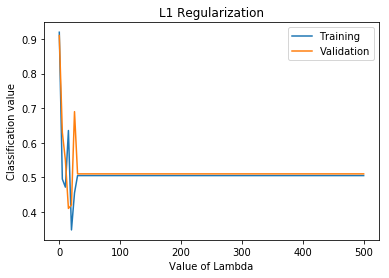

In [67]:
#L1 Regularization
#np.random.seed(111)
CRtrain2 = []
CRval2 = []
Jtrain2 = []
Jval2 = []
for i in np.linspace(0,1000,101):
    w = np.random.rand(9,4)
    eta = 5e-1
    epochs = int(5e3)
    lmbda = i
                                                                #J_l1 = []
    
    for t in range(epochs):
        p = softmax(PHI.dot(w))
                                                                #J_l1.append(cross_entropy_l1(y, p, w, lmbda, len(X)))
        w -= eta * (1/len(X)) * PHI.T.dot(p-y)+lmbda*np.sign(w)
    
    pval = softmax(PHIval.dot(w))
    CRtrain2.append(classification_rate(y, p))
    CRval2.append(classification_rate(yval, pval))
    Jtrain2.append(cross_entropy(y, p))
    Jval2.append(cross_entropy(yval, pval))

plt.plot(L2, CRtrain2, label='Training')
plt.plot(L2, CRval2, label='Validation')
plt.title("L1 Regularization")
plt.xlabel("Value of Lambda")
plt.ylabel("Classification value")
plt.legend(loc='upper right')
#plt.savefig(filename)

In [ ]:
##In this graph it converges but it does not make sense to do anything with it because clearly regularising makes your model worse the more you increase lambda

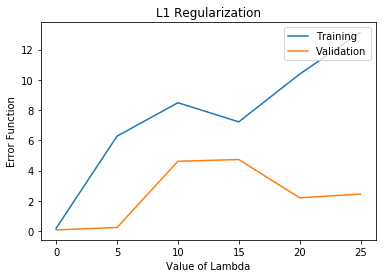

In [68]:
plt.plot(L2, Jtrain2, label='Training')
plt.plot(L2, Jval2, label='Validation')
plt.title("L1 Regularization")
plt.xlabel("Value of Lambda")
plt.ylabel("Error Function")
plt.legend(loc='upper right')
#plt.savefig(filename)

In [73]:
Jtrain2 #If it says nan it means that it is quickly diverging to infinity, that is why the value of lambda in the graph only goes up to 25, because after that you error start going toward infinity

[0.19082346405134779,
 6.278521210967741,
 8.487565294656827,
 7.224129479616973,
 10.380460277648904,
 13.149061693226496,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## Artificial Neural Network

In [24]:
# Build the model

Q = 9
D = 8
K = 4
W1 = np.random.randn(D, Q)
b1 = np.random.randn(Q)
W2 = np.random.randn(Q, K)
b2 = np.random.randn(K)

In [116]:
# Train the model
N = len(X)
J = []
eta = 6e-1
epochs = int(5e4)
CRtrain = []
CRval = []
CRtest = []
for i in range(15):
    Q = int(i)
    W1 = np.random.randn(D, Q)
    b1 = np.random.randn(Q)
    W2 = np.random.randn(Q, K)
    b2 = np.random.randn(K)
    for t in range(epochs):

        Z1, p = feed_forward(X, W1, b1, W2, b2)
        J.append(cross_entropy(y, p))
        W2 -= eta * (1/N)*np.matmul(Z1.T, p-y)
        b2 -= eta * ((1/N)*np.matmul(Z1.T, p-y)).sum(axis = 0)
        W1 -= eta * (1/N)*np.matmul(X.T, np.matmul(p-y, W2.T)*(1 - Z1*Z1))
        b1 -= eta * ((1/N)*np.matmul(X.T, np.matmul(p-y, W2.T)*(1 - Z1*Z1))).sum(axis = 0)


    pval = feed_forward(Xval, W1, b1, W2, b2)[-1]
    ptest = feed_forward(Xtest, W1, b1, W2, b2)[-1]
    CRtrain.append(classification_rate(y, p)) 
    CRval.append(classification_rate(yval, pval))
    CRtest.append(classification_rate(ytest,ptest))
    
'''plt.figure(figsize = (12,9))
plt.plot(J)'''

C:\Users\felip\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\felip\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\felip\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\felip\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


'plt.figure(figsize = (12,9))\nplt.plot(J)'

In [117]:
d = {'CRtrain': CRtrain, 'CRVal': CRval, 'CRtest': CRtest}
df = pd.DataFrame(data=d)

In [118]:
df #I should have use the seed for the weights

,CRtrain,CRVal,CRtest
0,0.290970,0.29,0.287129
1,0.505017,0.51,0.504950
2,0.505017,0.51,0.504950
3,0.906355,0.90,0.900990
4,0.946488,0.93,0.920792
5,0.859532,0.87,0.900990
6,0.996656,0.92,0.920792
7,1.000000,0.95,0.871287
8,0.996656,0.91,0.960396
9,1.000000,0.94,0.900990


In [80]:
Jtrain = [J[-1]] # Want to grab just the last value so when I ran my lambda I know that my first value of Jtrain is always my initial best unregularised error value, and lambda is supposed to start doing better than it from there
Jval = [cross_entropy(yval,pval)]
Jtrain_l2 = [J[-1]]
Jval_l2 = [cross_entropy(yval,pval)]
Jtrain_l1 = [J[-1]]
Jval_l1 = [cross_entropy(yval,pval)]

print(Jtrain,Jval)

[0.0008271809953542312] [0.12836140096477985]


## Train using Sigmoid instead of Tan

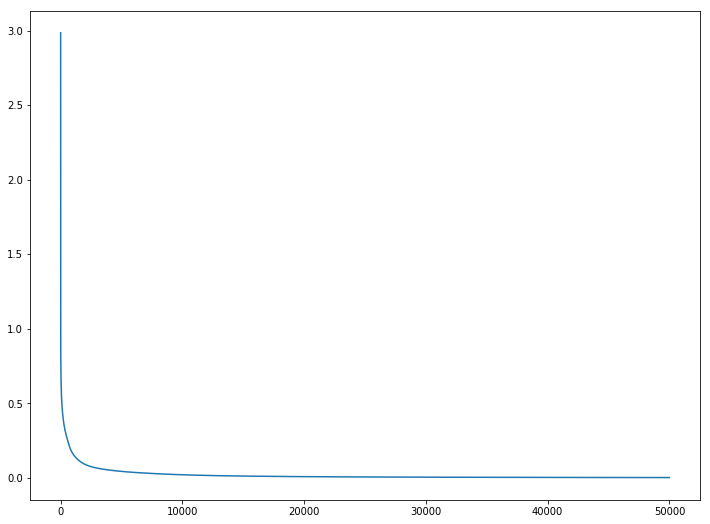

In [74]:
# Train the model using sigmoid instead
N = len(X)
Jsigmoid = []
eta = 6e-1
epochs = int(5e4)
CRtrainsigmoid = []
CRvalsigmoid = []
CRtestsigmoid = []
for i in range(1):
    W1sigmoid = np.random.randn(D, Q)
    b1sigmoid = np.random.randn(Q)
    W2sigmoid = np.random.randn(Q, K)
    b2sigmoid = np.random.randn(K)
    for t in range(epochs):

        Z1sigmoid, psigmoid = feed_forward_sigmoid(X, W1sigmoid, b1sigmoid, W2sigmoid, b2sigmoid)
        Jsigmoid.append(cross_entropy(y, psigmoid))
        W2sigmoid -= eta * (1/N)*np.matmul(Z1sigmoid.T, psigmoid-y)
        b2sigmoid -= eta * ((1/N)*np.matmul(Z1sigmoid.T, psigmoid-y)).sum(axis = 0)
        W1sigmoid -= eta * (1/N)*np.matmul(X.T, np.matmul(psigmoid-y, W2sigmoid.T)*(Z1sigmoid * (1-Z1sigmoid))) #Test if (1-Matrix) assumes that 1 is identity matrix
        b1sigmoid -= eta * ((1/N)*np.matmul(X.T, np.matmul(psigmoid-y, W2sigmoid.T)*(Z1sigmoid * (1-Z1sigmoid)))).sum(axis = 0)


    pvalsigmoid = feed_forward_sigmoid(Xval, W1sigmoid, b1sigmoid, W2sigmoid, b2sigmoid)[-1]
    ptestsigmoid = feed_forward_sigmoid(Xtest, W1sigmoid, b1sigmoid, W2sigmoid, b2sigmoid)[-1]
    CRtrainsigmoid.append(classification_rate(y, psigmoid)) 
    CRvalsigmoid.append(classification_rate(yval, pvalsigmoid))
    CRtestsigmoid.append(classification_rate(ytest,ptestsigmoid))
    
plt.figure(figsize = (12,9))
plt.plot(Jsigmoid)

In [98]:
print(CRtrainsigmoid, CRvalsigmoid, CRtestsigmoid)

[1.0] [0.92] [0.9207920792079208]


## L2 Regularization ANN

C:\Users\felip\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


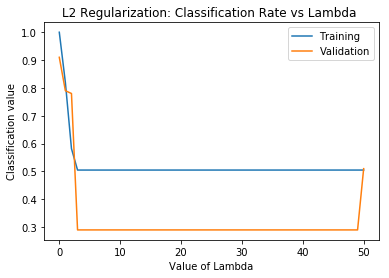

In [124]:
#L2 Regularization
np.random.seed(111)
CRtrain_l2 = []
CRval_l2 = []
CRtest_l2 = []
Jtrain_l2 = []
Jval_l2 = []
eta = 6e-1
epochs = int(5e4)
W1_l2 = np.random.randn(D, Q)
b1_l2 = np.random.randn(Q)
W2_l2 = np.random.randn(Q, K)
b2_l2 = np.random.randn(K)
L2 = np.linspace(0,1000,51)
for i in L2:
    lmbda = i

    for t in range(epochs):

        Z1_l2, p_l2 = feed_forward(X, W1_l2, b1_l2, W2_l2, b2_l2)
        W2_l2 -= eta * (1/N)*(np.matmul(Z1_l2.T, p_l2-y) + lmbda*W2_l2)
        b2_l2 -= eta * ((1/N)*(np.matmul(Z1_l2.T, p_l2-y)+ lmbda*W2_l2)).sum(axis = 0) 
        W1_l2 -= eta * (1/N)*(np.matmul(X.T, np.matmul(p_l2-y, W2_l2.T)*(1 - Z1_l2*Z1_l2))+ lmbda*W1_l2)
        b1_l2 -= eta * ((1/N)*(np.matmul(X.T, np.matmul(p_l2-y, W2_l2.T)*(1 - Z1_l2*Z1_l2))+ lmbda*W1_l2)).sum(axis = 0) 

        
    pval_l2 = feed_forward(Xval, W1_l2, b1_l2, W2_l2, b2_l2)[-1]
    ptest_l2 = feed_forward(Xtest, W1_l2, b1_l2, W2_l2, b2_l2)[-1]
    CRtrain_l2.append(classification_rate(y, p_l2)) 
    CRval_l2.append(classification_rate(yval, pval_l2))
    CRtest_l2.append(classification_rate(ytest,ptest_l2))
    Jtrain_l2.append(cross_entropy(y, p_l2)) 
    Jval_l2.append(cross_entropy(yval, pval_l2))


    
plt.plot(CRtrain_l2, label='Training')
plt.plot(CRval_l2, label='Validation')
plt.title("L2 Regularization: Classification Rate vs Lambda ")
plt.xlabel("Value of Lambda")
plt.ylabel("Classification value")
plt.legend(loc='upper right')
#plt.savefig(filename)

In [97]:
print(CRtrain_l2, CRval_l2, CRtest_l2)

[1.0, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.5050167224080268, 0.505016722408

Text(0.5,1,'L2 Regularization: J vs Lambda ')

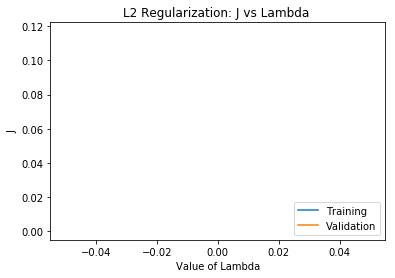

In [94]:
plt.plot(np.linspace(0,1000,101), Jtrain_l2, label="Training")
plt.plot(np.linspace(0,1000,101), Jval_l2, label="Validation")
plt.xlabel("Value of Lambda")
plt.ylabel("J")
plt.legend(loc='lower right')
plt.title("L2 Regularization: J vs Lambda ")
#plt.savefig(filename)

## L1 Regularisation ANN

In [132]:
#L2 Regularization
np.random.seed(111)
CRtrain_l1 = []
CRval_l1 = []
CRtest_l1 = []
Jtrain_l1 = []
Jval_l1 = []
eta = 6e-1
epochs = int(5e4)
W1_l1 = np.random.randn(D, Q)
b1_l1 = np.random.randn(Q)
W2_l1 = np.random.randn(Q, K)
b2_l1 = np.random.randn(K)
L2 = np.linspace(0,200,51)
for i in L2:
    lmbda = i

    for t in range(epochs):

        Z1_l1, p_l1 = feed_forward(X, W1_l1, b1_l1, W2_l1, b2_l1)
        W2_l1 -= eta * (1/N)*(np.matmul(Z1_l1.T, p_l1-y) + lmbda*np.sign(W2_l1))
        b2_l1 -= eta * ((1/N)*(np.matmul(Z1_l1.T, p_l1-y)+ lmbda*np.sign(W2_l1))).sum(axis = 0)
        W1_l1 -= eta * (1/N)*(np.matmul(X.T, (np.matmul(p_l1-y, W2_l1.T)*(1 - Z1_l1*Z1_l1) + lmbda*np.sign(W1_l1))))
        b1_l1 -= eta * ((1/N)*np.matmul(X.T, (np.matmul(p_l1-y, W2_l1.T)*(1 - Z1_l1*Z1_l1)+ lmbda*np.sign(W1_l1)))).sum(axis = 0)


    pval_l1 = feed_forward(Xval, W1_l1, b1_l1, W2_l1, b2_l1)[-1]
    ptest_l1 = feed_forward(Xtest, W1_l1, b1_l1, W2_l1, b2_l1)[-1]
    CRtrain_l1.append(classification_rate(y, p_l1)) 
    CRval_l1.append(classification_rate(yval, pval_l1))
    CRtest_l1.append(classification_rate(ytest,ptest_l1))
    Jtrain_l1.append(cross_entropy(y, p_l1)) 
    Jval_l1.append(cross_entropy(yval, pval_l1))


    
plt.plot(CRtrain_l1, label='Training')
plt.plot(CRval_l1, label='Validation')
plt.title("L1 Regularization: Classification Rate vs Lambda ")
plt.xlabel("Value of Lambda")
plt.ylabel("Classification value")
plt.legend(loc='upper right')
#plt.savefig(filename)

ValueError: operands could not be broadcast together with shapes (299,14) (8,14) 

In [99]:
Jtrain_l1

[0.0008719656098373445,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

Text(0.5,1,'L1 Regularization: J vs Lambda ')

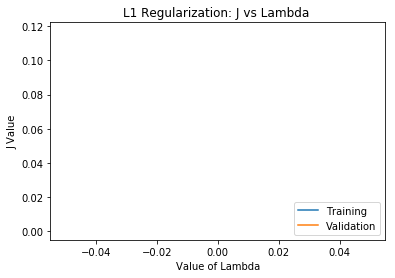

In [96]:
plt.plot(np.linspace(0,200,51), Jtrain_l1, label="Training")
plt.plot(np.linspace(0,200,51), Jval_l1, label="Validation")
plt.xlabel("Value of Lambda")
plt.ylabel("J Value")
plt.legend(loc='lower right')
plt.title("L1 Regularization: J vs Lambda ")
#plt.savefig(filename)